In [440]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import model_selection as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Obtaining the data

In [441]:
df = pd.read_csv("project.csv")

In [442]:
df = df.sort_values("Happiness Score",ascending = False, ignore_index = True)

In [443]:
to_remove = ['Happiness Rank','GDP per capita','Healthy life expectancy','Perceptions of corruption','Region','Country']

In [444]:
df = df.drop(to_remove,axis = 1)
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Agriculture,Industry,Service,Life expectancy,CPI Score,unemployment_percentage,Happiness Score,Social support,Freedom to make life choices,Generosity
0,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,...,0.018,0.246,0.735,79.25625,90.392080,5.8,7.54600,1.447688,0.625959,0.363876
1,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,0.021,0.415,0.564,81.79375,85.889854,4.0,7.54100,1.431075,0.638049,0.328360
2,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,7.19,...,0.028,0.295,0.676,80.71250,88.903927,8.7,7.53780,1.434429,0.621536,0.284849
3,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,10.42,...,0.015,0.340,0.645,82.33125,85.901674,3.0,7.51140,1.417332,0.620642,0.328272
4,299388,103000,2.9,4.83,2.38,3.31,30900.0,99.9,647.7,0.07,...,0.086,0.150,0.765,82.44375,79.474027,2.8,7.51100,1.492813,0.618035,0.294748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,...,0.135,0.472,0.393,63.86250,17.980347,27.0,3.62580,0.865448,0.244175,0.086517
138,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0.380,0.240,0.380,58.19375,13.017093,35.0,3.51280,0.409753,0.117924,0.165836
139,37445392,945087,39.6,0.15,-2.06,98.54,600.0,78.2,4.0,4.52,...,0.432,0.172,0.396,56.00625,32.650526,10.3,3.46600,0.939380,0.386880,0.201743
140,8648248,26338,328.4,0.00,0.00,91.23,1300.0,70.4,2.7,40.54,...,0.401,0.229,0.370,59.31250,51.683419,2.7,3.43860,0.788453,0.581611,0.345375


# Constructing the correlation matrix

In [445]:
corr_mat = df.corr()

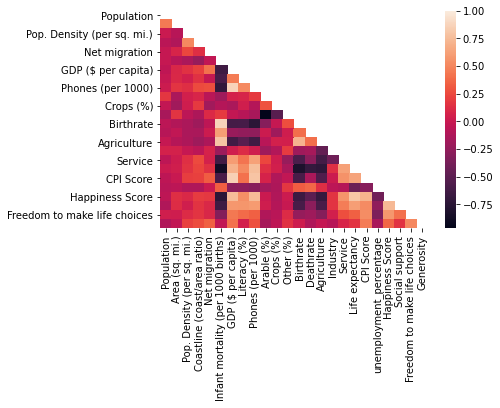

In [446]:
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr_mat, mask=mask ,)

# Checking the correlation between two variables

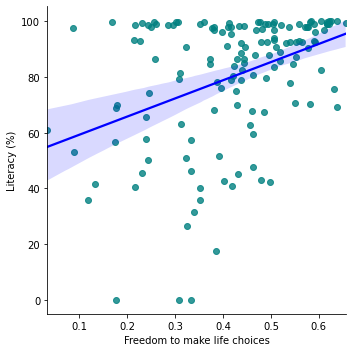

In [447]:
sns.lmplot(x = "Freedom to make life choices",y = "Literacy (%)",
           line_kws={'color': 'blue'},
           scatter_kws={'color': 'teal'},
           data = df);

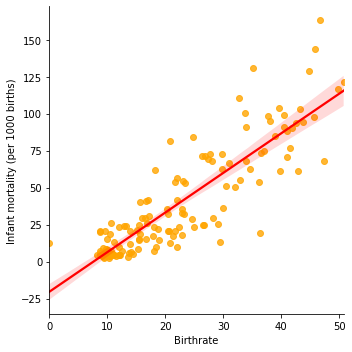

In [448]:
sns.lmplot(x = "Birthrate",y = "Infant mortality (per 1000 births)",line_kws={'color': 'red'},
           scatter_kws={'color': 'orange'},
           data = df);

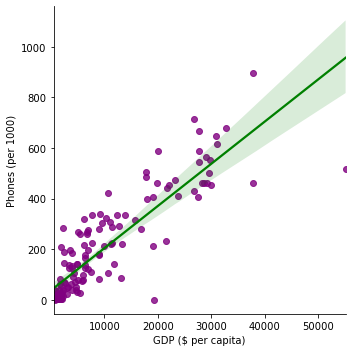

In [449]:
sns.lmplot(x = "GDP ($ per capita)",y = "Phones (per 1000)",line_kws={'color': 'green'},
           scatter_kws={'color': 'purple'},
           data = df);

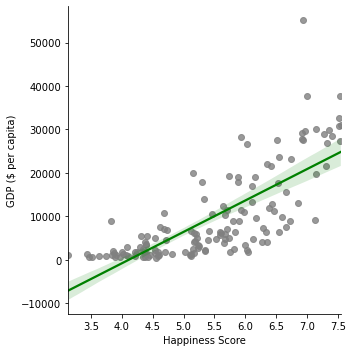

In [450]:
sns.lmplot(x = "Happiness Score",y = "GDP ($ per capita)",line_kws={'color': 'green'},
           scatter_kws={'color': 'gray'},
           data = df);

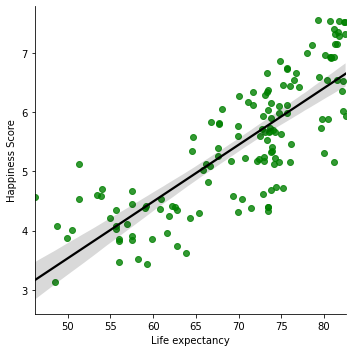

In [451]:
sns.lmplot(x = "Life expectancy",y = "Happiness Score",line_kws={'color': 'black'},
           scatter_kws={'color': 'green'},
           data = df);

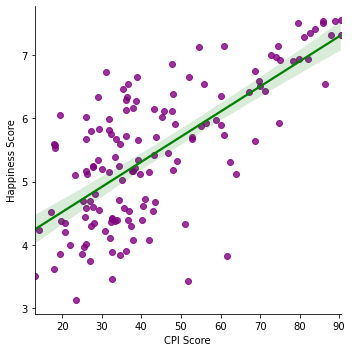

In [452]:
sns.lmplot(x = "CPI Score",y = "Happiness Score",line_kws={'color': 'green'},
           scatter_kws={'color': 'purple'},
           data = df);

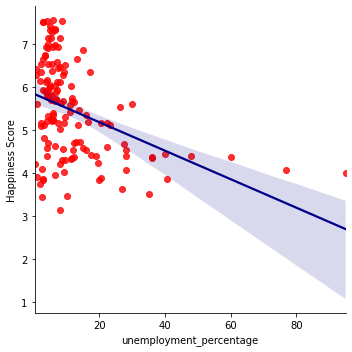

In [453]:
sns.lmplot(x = "unemployment_percentage",y = "Happiness Score",line_kws={'color': 'darkblue'},
           scatter_kws={'color': 'red'},
           data = df);

# Dividing the data into "Attributes" and "Labels"

In [454]:
X_col = list(df.columns)
X_col.remove("Happiness Score")
y_col = ["Happiness Score"]
X = df[X_col].values
y = df[y_col].values

# Splitting the data into "Train" and "Test" 

In [455]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear Regression

## Fitting the train data into Regression model

In [456]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train);

## Constructing y_true and y_pred (observed and predicted)

In [457]:
y_pred = regressor.predict(X_test)
y_true = y_test

## Function to calculate pearson correlation coefficent

In [458]:
def calc_pearson(observed, predicted):
    n = len(observed)
    sum_x = 0
    sum_sqr_x = 0
    sum_y = 0
    sum_sqr_y = 0
    sum_xy = 0
    for i in observed:
        sum_x += i 
        sum_sqr_x += i**2
    for i in predicted:
        sum_y += i
        sum_sqr_y += i**2
    for i in range(n):
        sum_xy += observed[i]*predicted[i]
        
    pearson_r = (sum_xy -(n*(sum_x/n)*(sum_y/n))) / ((sum_sqr_x - n*(sum_x/n)**2) * (sum_sqr_y - n*(sum_y/n)**2))**0.5
    
    
    return pearson_r

## Calculating pearson correlation coefficent

In [459]:
calc_pearson(y_true,y_pred)[0]

0.8899235203913908

## Calculating MAE , MSE , RMSE

In [460]:
print('Mean Absolute Error:', sk.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', sk.metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.42351380022391605
Mean Squared Error: 0.2551143181005563
Root Mean Squared Error: 0.5050884260211832


## Actual vs Predicted Barplot

In [461]:
actual = pd.Series(name = "Actual",data = y_true.reshape(len(y_true),))
predicted = pd.Series(name = "Predicted",data = y_pred.reshape(len(y_pred),))

In [462]:
df_bar = pd.DataFrame({"Actual": actual, "Predicted": predicted})

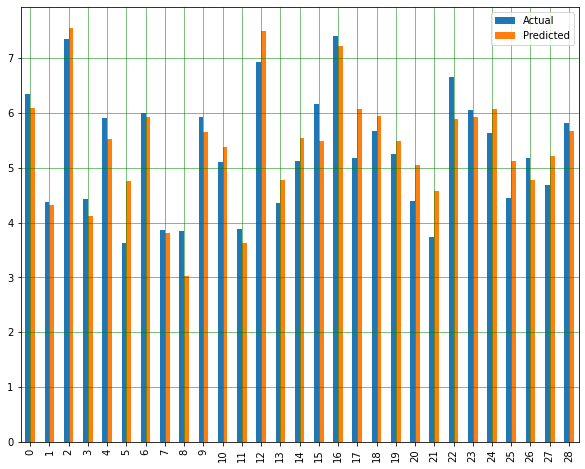

In [463]:
df_bar.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Observed vs Predicted Plot

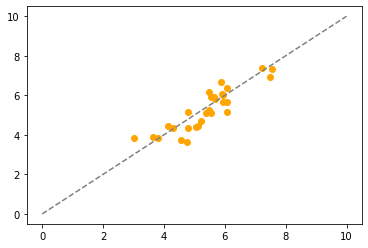

In [464]:
plt.scatter(y_pred,y_test,  color='orange')
plt.plot([0,10], [0,10],'--', color = 'gray')
plt.show()

# Decision Tree Regression

In [465]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [466]:
y_true = y_test

## Pearson Coorelation Coefficent

In [467]:
calc_pearson(y_true,y_pred)[0]

0.8453910309173311

## MAE , MSE , RMSE

In [468]:
print('Mean Absolute Error:', sk.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', sk.metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5527569038796699
Mean Squared Error: 0.4537747172733493
Root Mean Squared Error: 0.6736280258965992


## Observed vs Predicted Plot

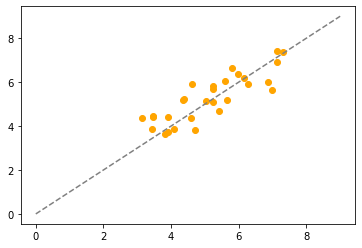

In [469]:
plt.scatter(y_pred,y_test,  color='orange')
plt.plot([0,9], [0,9],'--', color = 'gray')
plt.show()

## Actual vs Predicted Barplot

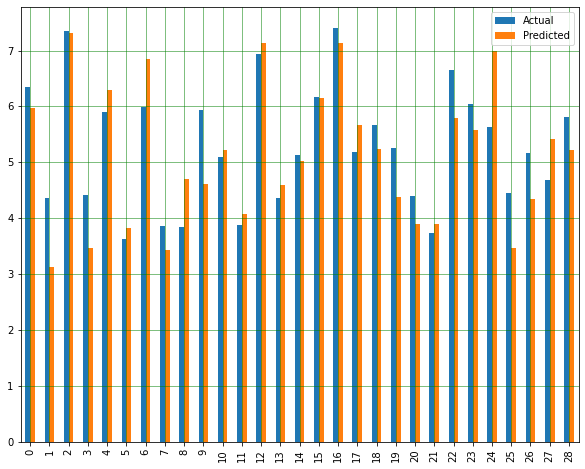

In [470]:
actual = pd.Series(name = "Actual",data = y_true.reshape(len(y_true),))
predicted = pd.Series(name = "Predicted",data = y_pred.reshape(len(y_pred),))

df_bar = pd.DataFrame({"Actual": actual, "Predicted": predicted})

df_bar.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forests Regression

In [471]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<ipython-input-471-6d5cf47c389b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [472]:
y_true = y_test

## Pearson Coorelation Coefficent

In [473]:
calc_pearson(y_true,y_pred)[0]

0.9249159183170449

## MAE , MSE , RMSE

In [474]:
print('Mean Absolute Error:', sk.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', sk.metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.32979761307374783
Mean Squared Error: 0.17288732824784958
Root Mean Squared Error: 0.41579722010596654


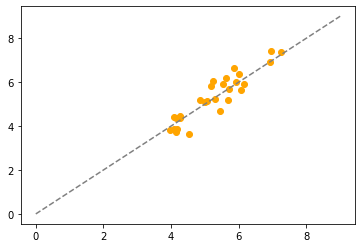

In [475]:
plt.scatter(y_pred,y_test,  color='orange')
plt.plot([0,9], [0,9],'--', color = 'gray')
plt.show()

## Actual vs Predicted Barplot

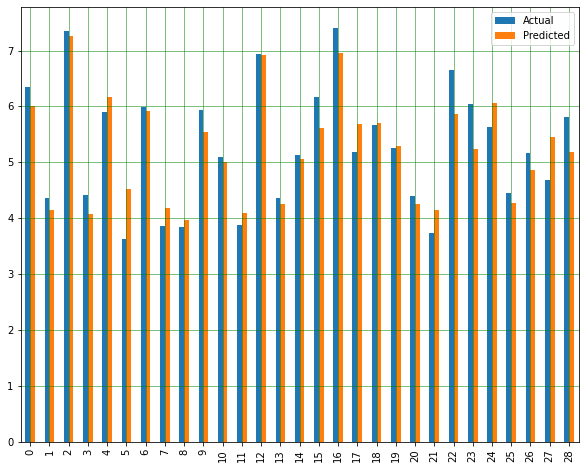

In [476]:
actual = pd.Series(name = "Actual",data = y_true.reshape(len(y_true),))
predicted = pd.Series(name = "Predicted",data = y_pred.reshape(len(y_pred),))

df_bar = pd.DataFrame({"Actual": actual, "Predicted": predicted})

df_bar.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Linear Regression with KFold

## Applying KFold

In [477]:
splits = 10
kf = ms.KFold(n_splits= splits,shuffle=True)

X_trains = []
X_tests = []
y_trains = []
y_tests = []

for train,test in kf.split(X):
    X_Train = X[train]
    X_Test = X[test]
    
    X_trains.append(X_Train)
    X_tests.append(X_Test)

for train,test in kf.split(y):
    y_Train = y[train]
    y_Test = y[test]
    
    y_trains.append(y_Train)
    y_tests.append(y_Test)

## Calculating Pearson Coorelation Coefficent, MAE, MSE, RMSE

In [478]:
pearsonn = 0
mae = 0
mse = 0
rmse = 0
for i in range(splits):
    X_trainee = X_trains[i]
    y_trainee = y_trains[i]
    regressor = LinearRegression()
    regressor.fit(X_trainee, y_trainee);
    X_testit = X_tests[i]
    y_testit = y_tests[i]
    
    y_predd = regressor.predict(X_testit)
    y_truee = y_testit
    
    pearsonn += calc_pearson(y_truee,y_predd)[0] / splits
    mae += sk.metrics.mean_absolute_error(y_truee, y_predd) / splits
    mse += sk.metrics.mean_squared_error(y_truee, y_predd) / splits
    rmse += np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)) / splits

In [479]:
print("Pearson Coorelation Coefficent (n_splits = {}) : {}".format(splits,pearsonn))
print('Mean Absolute Error (n_splits = {}) :'.format(splits), mae)  
print('Mean Squared Error (n_splits = {}) : '.format(splits), mse)  
print('Root Mean Squared Error (n_splits = {}) : '.format(splits), rmse)

Pearson Coorelation Coefficent (n_splits = 10) : 0.8147070414670576
Mean Absolute Error (n_splits = 10) : 0.5734828203708242
Mean Squared Error (n_splits = 10) :  0.5222367043434811
Root Mean Squared Error (n_splits = 10) :  0.4157972201059666


## Observed vs Predicted Plots

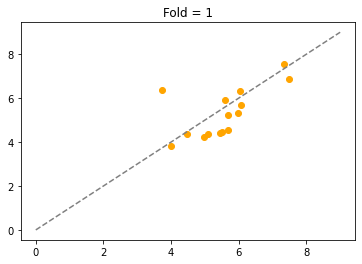

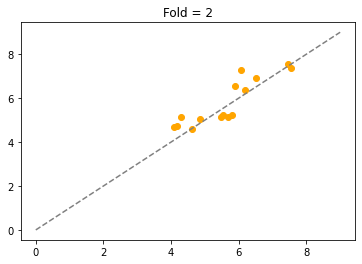

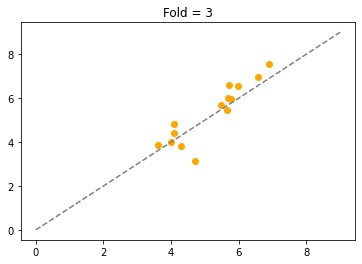

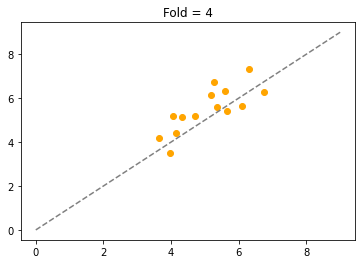

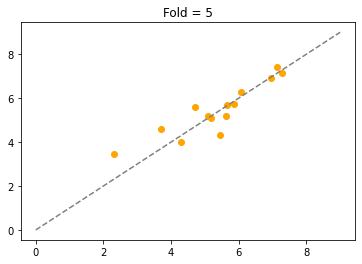

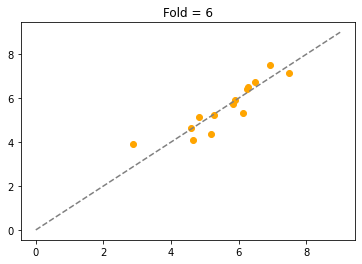

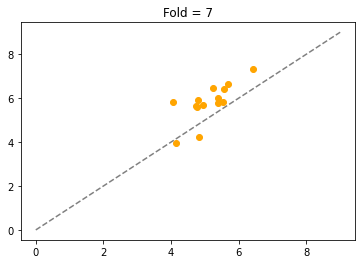

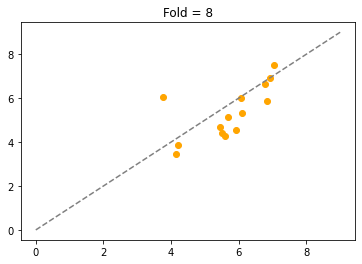

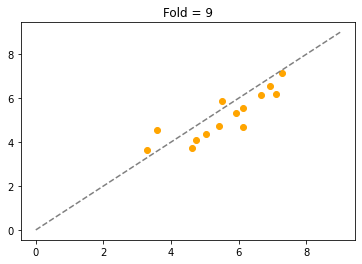

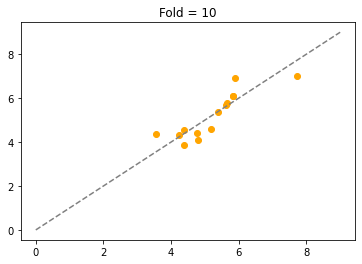

In [480]:
for i in range(splits):
    X_trainee = X_trains[i]
    y_trainee = y_trains[i]
    regressor = LinearRegression()
    regressor.fit(X_trainee, y_trainee);
    X_testit = X_tests[i]
    y_testit = y_tests[i]
    
    y_predd = regressor.predict(X_testit)
    y_truee = y_testit
    
    plt.scatter(y_predd,y_truee,  color='orange')
    plt.title("Fold = {}".format(i+1))
    plt.plot([0,9], [0,9],'--', color = 'gray')
    plt.show()

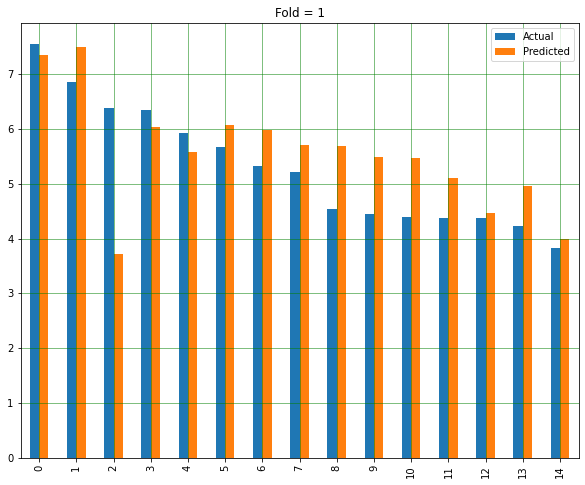

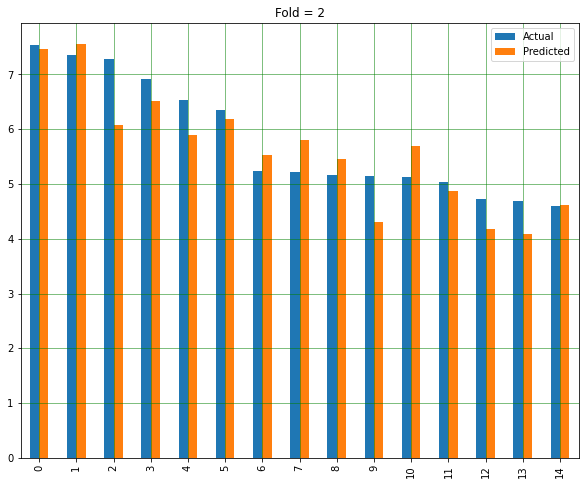

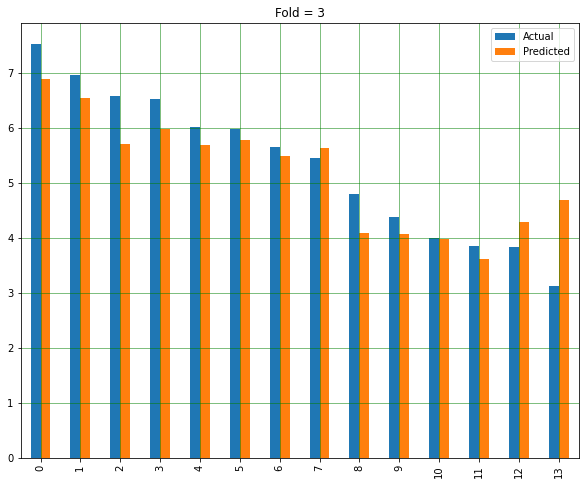

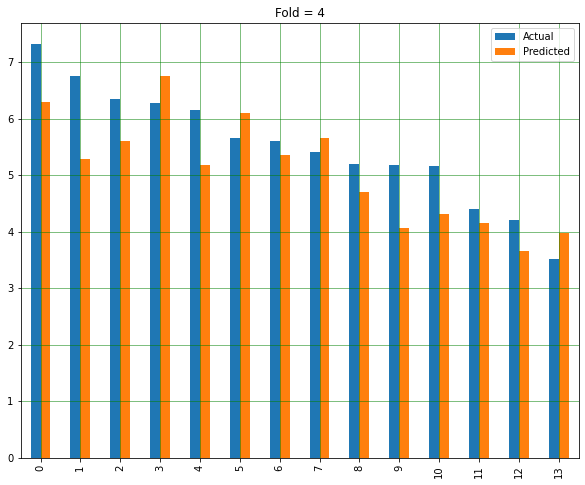

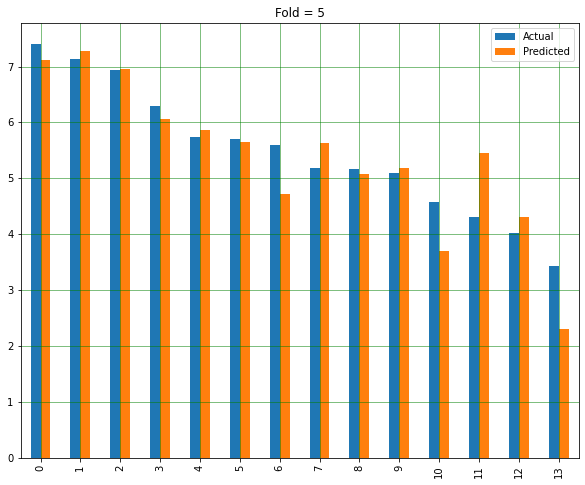

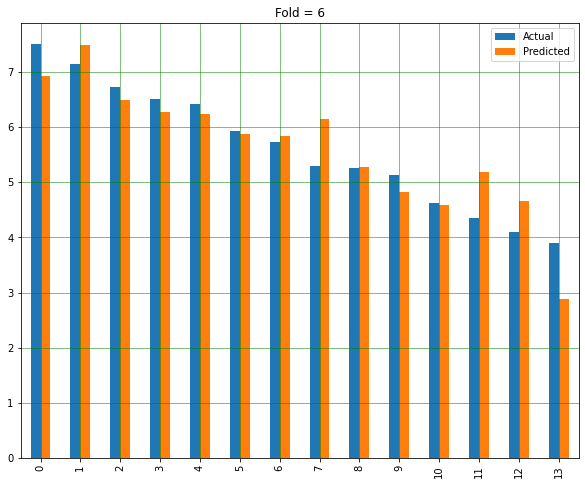

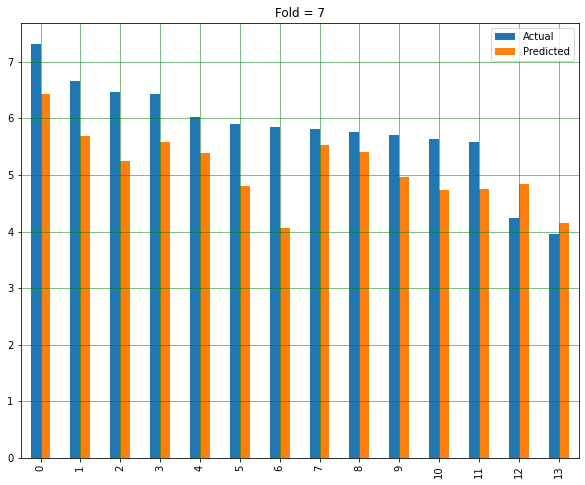

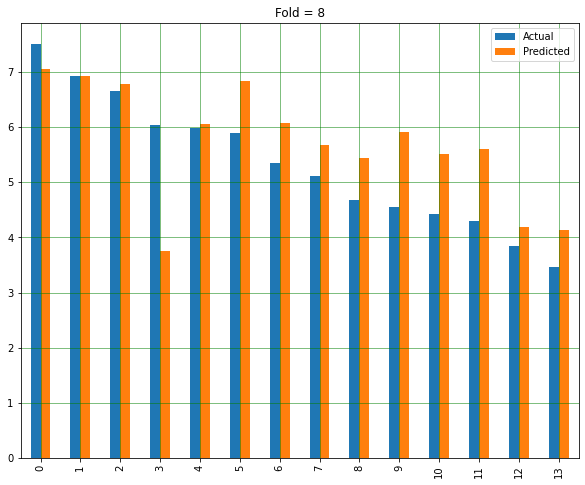

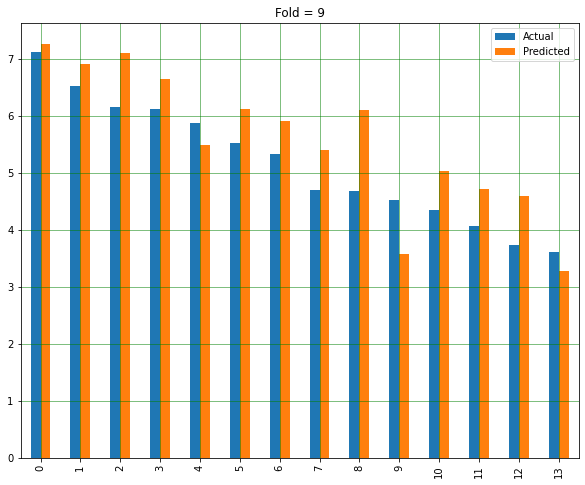

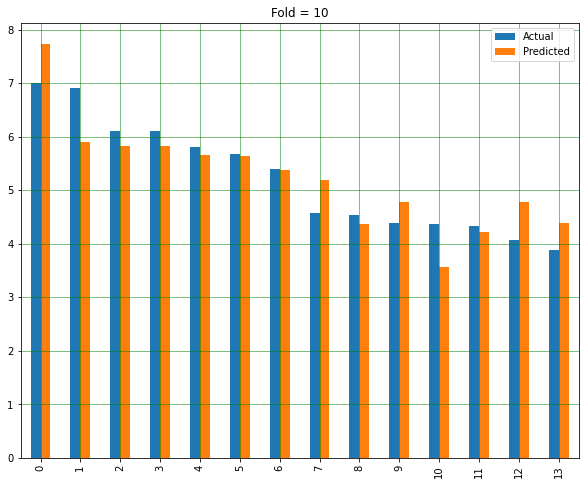

In [481]:
for i in range(splits):
    X_trainee = X_trains[i]
    y_trainee = y_trains[i]
    regressor = LinearRegression()
    regressor.fit(X_trainee, y_trainee);
    X_testit = X_tests[i]
    y_testit = y_tests[i]
    
    y_predd = regressor.predict(X_testit)
    y_truee = y_testit
    
    actual = pd.Series(name = "Actual",data = y_truee.reshape(len(y_truee),))
    predicted = pd.Series(name = "Predicted",data = y_predd.reshape(len(y_predd),))

    df_bar = pd.DataFrame({"Actual": actual, "Predicted": predicted})

    df_bar.plot(kind='bar',figsize=(10,8))
    plt.title("Fold = {}".format(i+1))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()